In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
file=pd.read_csv('ODI_data.csv')

In [12]:
sachin=file[file['Innings Player']=='SR Tendulkar']
sachin_runs=sachin[['Innings Runs Scored','Opposition']]
sachin_runs=sachin_runs.dropna()
sachin_runs=sachin_runs[~sachin_runs['Innings Runs Scored'].isin(['TDNB','DNB'])]
sachin_runs.loc[:,'Innings Runs Scored']=sachin_runs['Innings Runs Scored'].str.replace('*','',regex=False)
sachin_runs.loc[:,'Innings Runs Scored']=sachin_runs['Innings Runs Scored'].astype(int)
sachin_runs['Innings Number']=np.arange(1,len(sachin_runs)+1)
sachin_runs = sachin_runs[['Innings Number'] + [col for col in sachin_runs.columns if col != 'Innings Number']]
sachin_runs_updated=sachin_runs[['Innings Runs Scored','Innings Number']]
X=sachin_runs_updated['Innings Number'].values.reshape(-1,1)
Y=sachin_runs_updated['Innings Runs Scored'].values
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(X,Y)
y_pred = model.predict(X)
print(y_pred)

[ 52.47603789 112.29460682   6.78465682  37.20209298  15.94965238
  19.85365238   6.71396353  15.5301591   43.55598108   7.27700846
  18.02350111  79.68584049  54.51924717   7.17417918 106.66361999
  30.12079722  39.77838504 116.3455711   28.73007323  25.63157531
   9.26947347 195.86170727   6.57178607   9.26034701  88.11184774
  50.85747102  59.96214974  14.91125492 167.73757926  40.08065523
  32.92530105   8.37076699  11.84098639  11.84098639 132.02096379
  31.67236364  44.96891502 157.46048154  60.6265635   19.98060872
   8.44165451   8.14165451   8.14165451  45.04378263  16.23245804
  89.80057268 111.17397778  62.32595573   4.71171039   4.71171039
   7.13925797  33.47978222  36.87409932  34.20914201  21.26162435
  30.32495797  89.77347753  37.86193784  91.95196363   9.08262936
  23.23050264  66.91880721  51.36754783  69.07806373  42.01790405
  17.25962585   8.5942218   28.78289528  85.67792394  66.83187432
  54.30698552  13.77882345  91.30914722  18.7239894   12.0832854
  91.252975

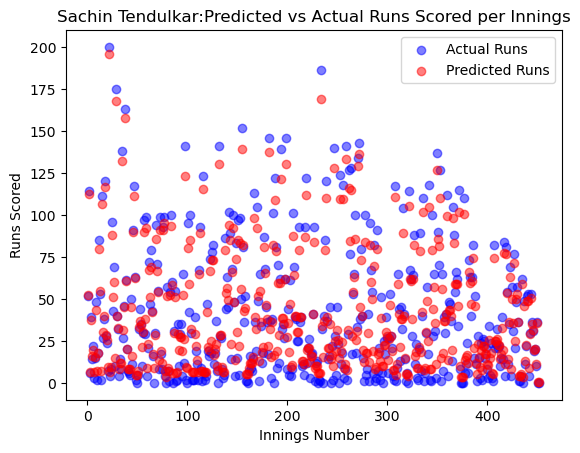

In [14]:
plt.scatter(X, Y, color='blue', label="Actual Runs", alpha=0.5)
plt.scatter(X, y_pred, color='red', label="Predicted Runs", alpha=0.5)
plt.xlabel("Innings Number")
plt.ylabel("Runs Scored")
plt.title("Sachin Tendulkar:Predicted vs Actual Runs Scored per Innings")
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"R² Score: {r2_score(Y, y_pred)}")
print(f"MAE: {mean_absolute_error(Y, y_pred)}")
print(f"MSE: {mean_squared_error(Y, y_pred)}")

R² Score: 0.9673224936543726
MAE: 5.813788420725696
MSE: 52.27136870011231


In [18]:
virat=file[file['Innings Player']=='V Kohli']
virat_runs=virat[['Innings Runs Scored','Opposition']]
virat_runs=virat_runs.dropna()
virat_runs=virat_runs[~virat_runs['Innings Runs Scored'].isin(['TDNB','DNB'])]
virat_runs.loc[:,'Innings Runs Scored']=virat_runs['Innings Runs Scored'].str.replace('*','',regex=False)
virat_runs.loc[:,'Innings Runs Scored']=virat_runs['Innings Runs Scored'].astype(int)
virat_runs['Innings Number']=np.arange(1,len(virat_runs)+1)
virat_runs = virat_runs[['Innings Number'] + [col for col in sachin_runs.columns if col != 'Innings Number']]
virat_runs_updated=virat_runs[['Innings Number','Innings Runs Scored']]
X1=virat_runs_updated['Innings Number'].values.reshape(-1,1)
Y1=virat_runs_updated['Innings Runs Scored'].values
new_model=GradientBoostingRegressor(n_estimators=500,learning_rate=0.2,random_state=42)
new_model.fit(X1,Y1)
runs_predicted=new_model.predict(X1)
print(runs_predicted)

[119.74964917   1.83424899  33.30999945  26.77515055  65.93824444
  70.49043733  68.16717021  76.44424412  80.94346456  19.20312821
  19.434129     8.23566265 121.58161244 115.38983792  45.62966619
  58.48719516  44.00681784  45.62278315  46.53764252 102.04009537
   5.57898797  31.96058868  17.66505739 106.8498439  155.43133361
 140.64993923  70.5470271   46.40750943  75.27783712 127.11907731
  37.57153209  74.62180022 156.861105    48.36423297 110.91399043
 110.91399043  30.365657   119.37357493  39.19199852  22.92774388
  28.33342165  89.67744463   2.95414752 109.55389421 129.23519026
   4.97568296   5.64800296  81.42046473 109.50696949   5.00087238
  11.76996512  84.87194482  32.14620865   6.90190655  94.28041929
  76.42790294   1.44963851  79.04780012  53.86925918  10.35034498
 118.71634697  64.49849121  49.08475065 148.70987383  13.26707448
  80.83047098  11.13486291 104.82230694 114.9291858   60.61321015
  89.5313986   10.19063309 135.42919216  76.35479165  12.67170229
  12.08130

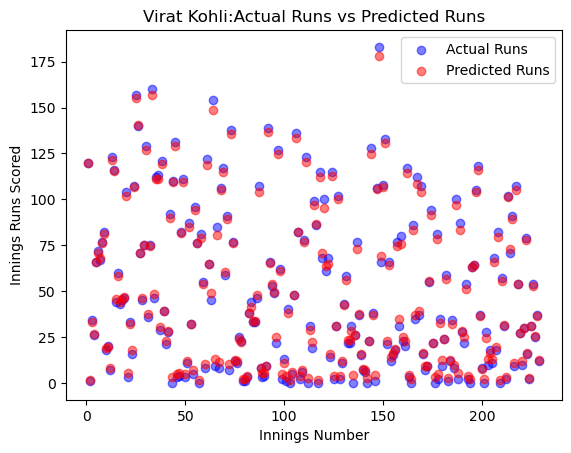

In [20]:
plt.scatter(X1,Y1, color="blue",label="Actual Runs",alpha=0.5)
plt.scatter(X1,runs_predicted,color="red",label="Predicted Runs",alpha=0.5)
plt.title("Virat Kohli:Actual Runs vs Predicted Runs")
plt.xlabel("Innings Number")
plt.ylabel("Innings Runs Scored")
plt.legend()
plt.show()

In [22]:
print(f"R² Score: {r2_score(Y1, runs_predicted)}")
print(f"MAE: {mean_absolute_error(Y1, runs_predicted)}")
print(f"MSE: {mean_squared_error(Y1, runs_predicted)}")

R² Score: 0.9978408771002893
MAE: 1.6652913607104995
MSE: 4.025260797028397
